In [1]:
%matplotlib inline

In [2]:
import sympy as sym
sym.init_printing()

initial differential equation

$y'''-6y''+12y'-8y=0 \iff y'''=6y''-12y'+8y$


spliting for odeint

$y' = u$

$u' = v~~~$ `u' = y''`

$v' = 6v - 12u -8y$ `v' = y'''`


In [3]:
x = sym.symbols("x")
y = sym.Function("y")(x)
u = sym.Function("u")(x)
v = sym.Function("v")(x)

dydx = u
dudx = v
dvdx = 6*v-12*u+8*y

In [4]:
sym.expand((x-2)**3)

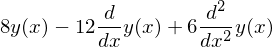

In [5]:
d3ydx3 = dvdx.subs(v, u.diff(x)).subs(u, y.diff(x))
d3ydx3

In [6]:
d3ydx3.subs(y.diff(x,2), v).subs(y.diff(x), u)

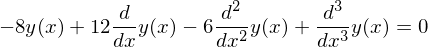

In [7]:
diffeq = sym.Eq(y.diff(x, 3)- d3ydx3,0)
diffeq

In [8]:
sym.dsolve(diffeq, y)

### Free fall with newtownian friction

$m \dot{v} = -mg + kv^2 \iff \dot{v} = -g + \dfrac{kv^2}{m} $


Text(0,0.5,'abs(v)')

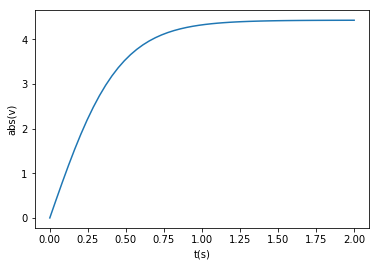

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


g = 9.8
k0 = 1
m0 = 2

def free_fall_v(v, t, g, k, m):
    dvdt = -g + (k*v**2)/m
    return dvdt

t = np.linspace(0,2)
v0 = 0

res = odeint(free_fall_v, v0, t, args=(g,k0,m0))
plt.plot(t, np.abs(res))
plt.xlabel("t(s)")
plt.ylabel("abs(v)")
    

### Damped harmonic oscillator
$ \ddot{x} + 2\gamma\dot{x}+ \omega_{0}^2 x = 0 \iff \ddot{x} = - 2\gamma\dot{x}- \omega_{0}^2 x$

seperate the ode 2nd order in 2 ode's 1st order

$\dot{x} = u$

$\dot{u} = -2\gamma{u} - \omega_{0}^2 x$


Text(0,0.5,'Amplitude')

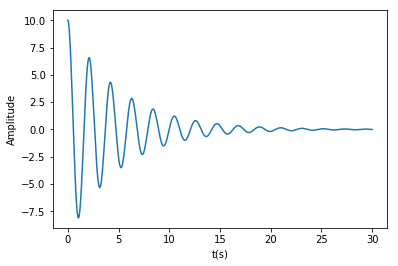

In [10]:
def damped_oszi(X, t, gamma, omega):
#     x = X[0], u = X[1] 
    u = X[1]
    u_dot =  -2*gamma*u - X[0]*omega**2
    return [u, u_dot]

t = np.linspace(0,30, 1000)
X0 = x0, x_dot_0 = [10, 0]

gamma0, omega0 = 0.2, 3

res = odeint(damped_oszi, X0, t, args=(gamma0, omega0))
plt.plot(t, res.T[0])
plt.xlabel("t(s)")
plt.ylabel("Amplitude")
    